
> **Rashmi Manwani**<br>
**The Sparks Foundation**
<br>**Task 02**
<br>**Prediction using Unsupervised Learning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Iris.csv',sep=',')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Number of rows and columns in tha dataframe
df.shape

(150, 6)

In [5]:
df.head() #first five rows of the dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**checking for any null values in the dataset**

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**As all the values are zero, there are no null values present in the dataframe**

In [7]:
#Checking the overall structure of the dataframe with the help of 'describe()' function
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Figure size 1800x576 with 0 Axes>

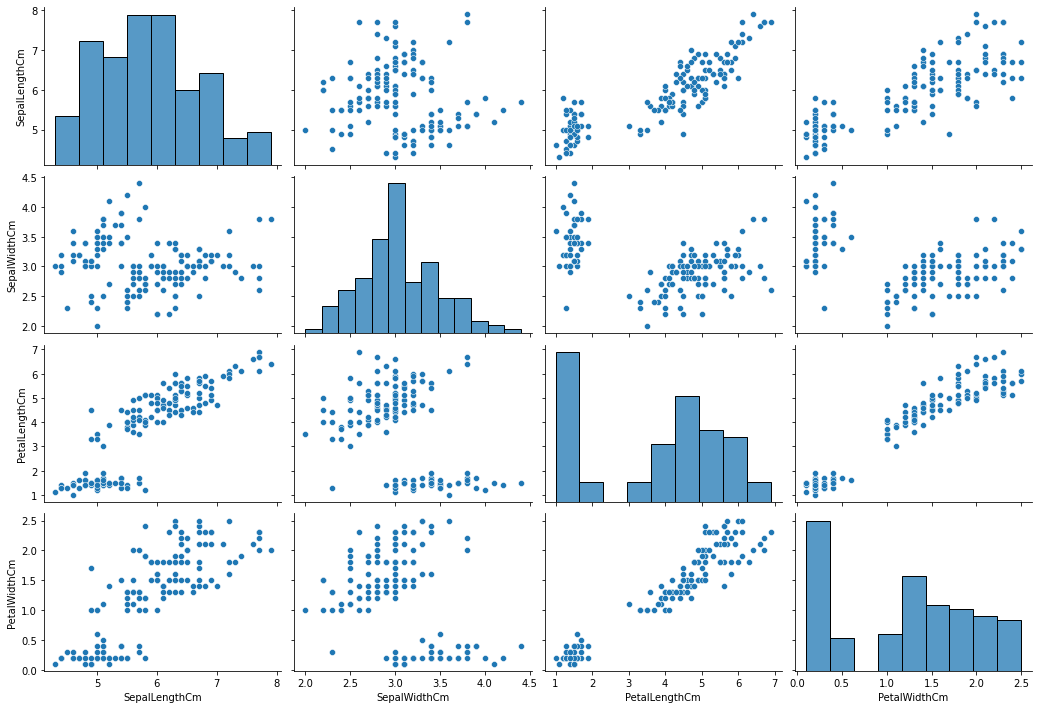

In [8]:
#plt.style.use('classic')
plt.figure(figsize=(25,8))
g = sns.pairplot(df.iloc[:,1:])
g.fig.set_size_inches(15,10)


**Visualising the Petal Length and Petal Width**

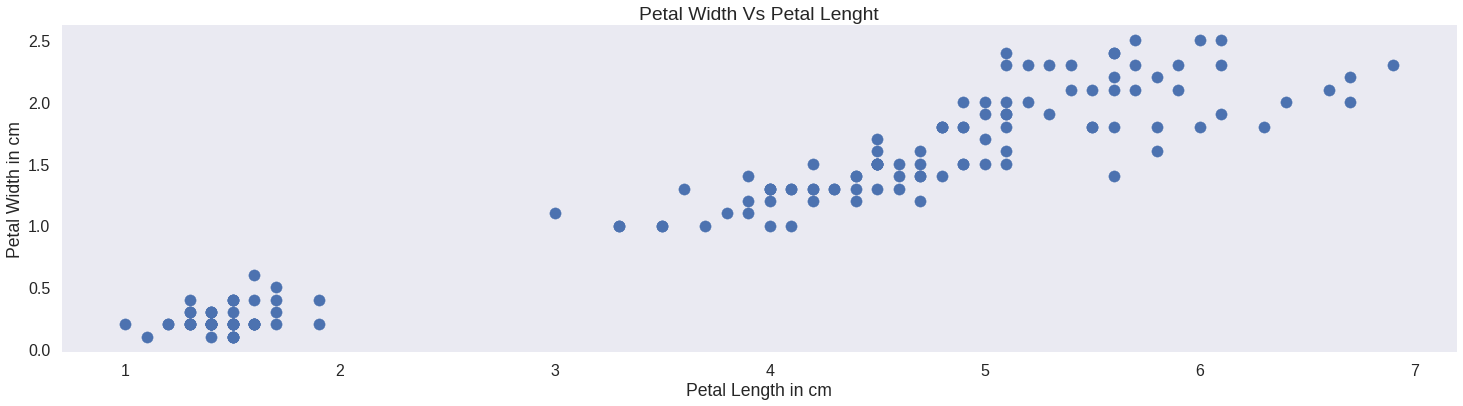

In [23]:
plt.figure(figsize=(25,6))
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.title('Petal Width Vs Petal Lenght')
plt.style.use('seaborn-dark')
plt.show()

**Visualising Sepal Legth and Sepal Width**

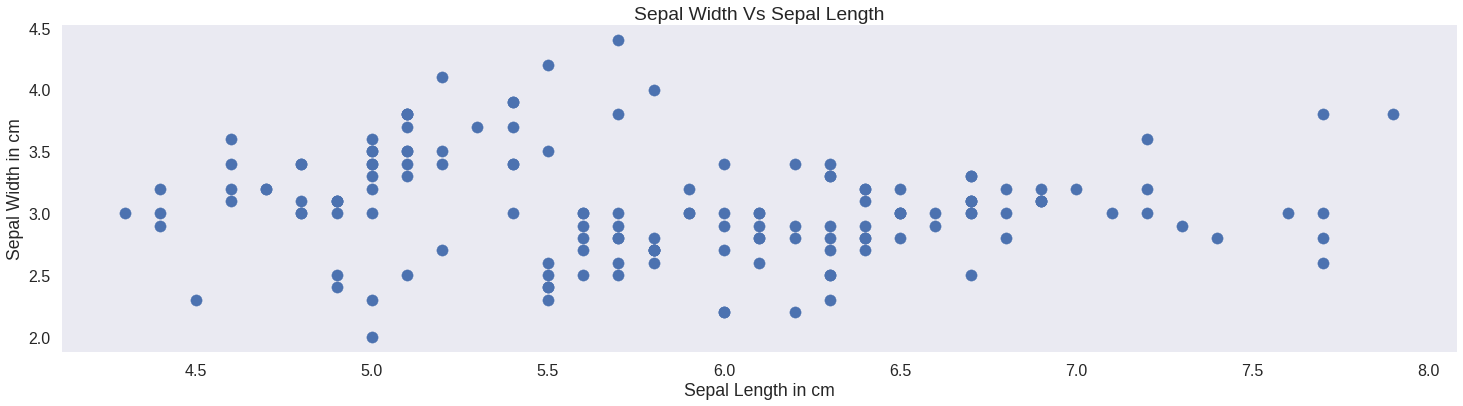

In [24]:
plt.figure(figsize=(25,6))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.title('Sepal Width Vs Sepal Length')
plt.style.use('seaborn-dark')
plt.show()

**Finding the optimum number of clusters for k-means classification**

In [11]:
x = df.iloc[:, [0,1, 2, 3, 4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


**Plotting the results onto a line graph, allowing us to observe 'The elbow'**



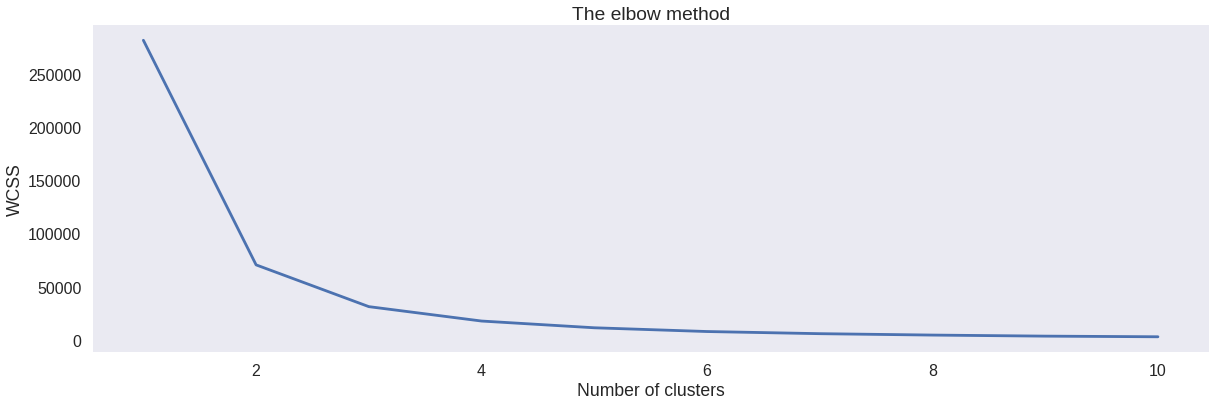

In [25]:
plt.figure(figsize=(20,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster Sum of Squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Thus, the data is classified into **three** types of clusters. <br>
**0** - **Iris-setosa**<br>
**1** - **Iris-versicolour**<br>
**2** - **Iris-virginica**<br>


In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


**Visualising the clusters - On the first two columns**

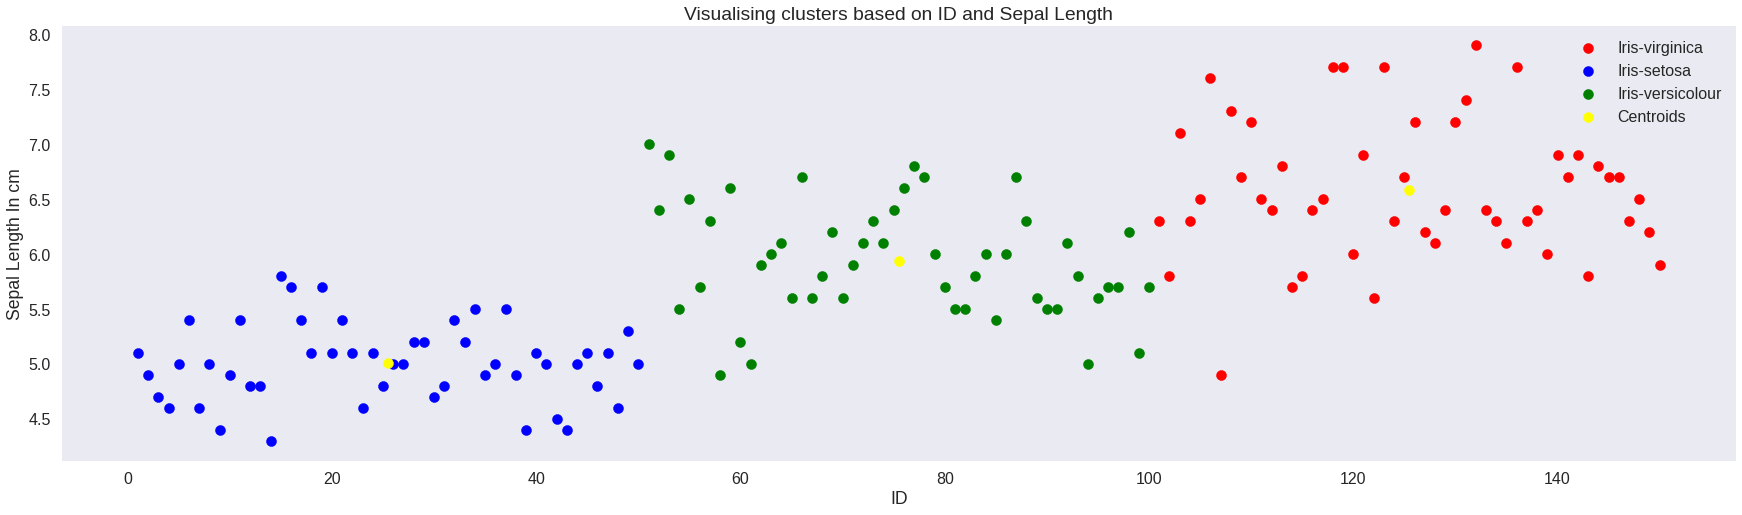

In [26]:
plt.figure(figsize=(30,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('ID')
plt.ylabel('Sepal Length In cm')
plt.title('Visualising clusters based on ID and Sepal Length')
plt.style.use('seaborn-dark')

plt.legend()

**Visualising the clusters - On the first and third columns**

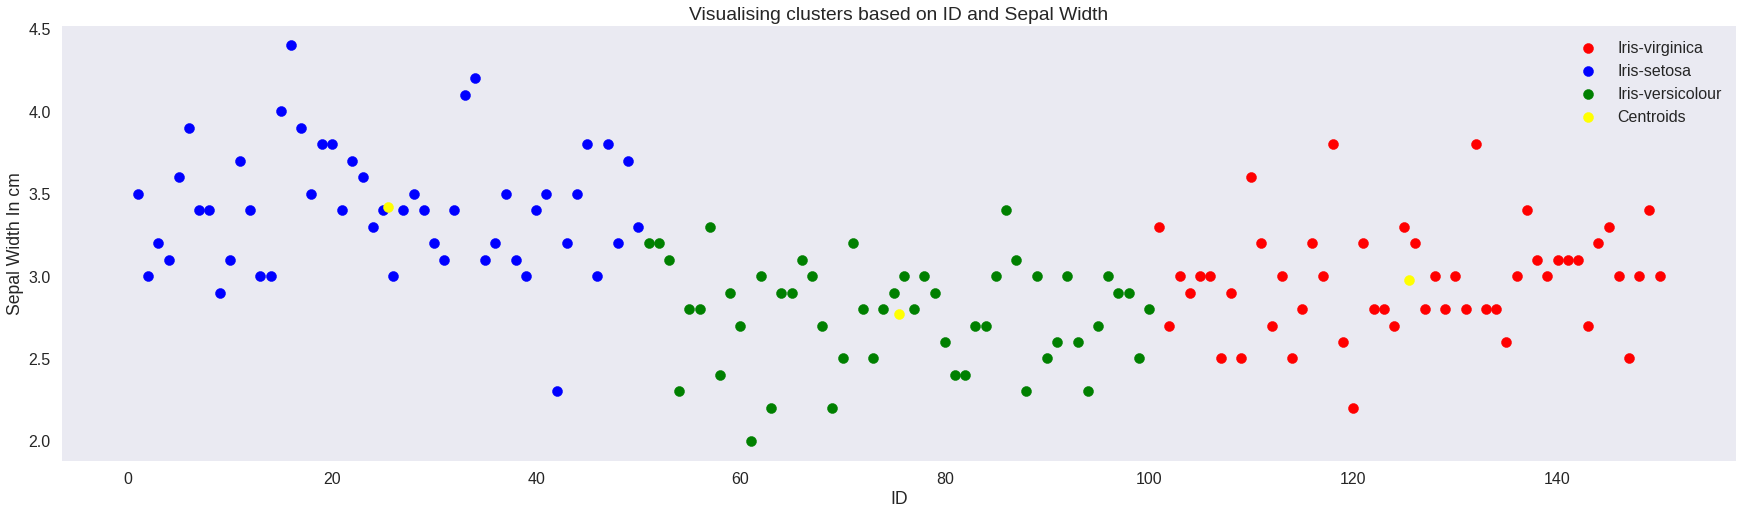

In [27]:
plt.figure(figsize=(30,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('ID')
plt.ylabel('Sepal Width In cm')
plt.title('Visualising clusters based on ID and Sepal Width')
plt.style.use('seaborn-dark')

plt.legend()

**Visualising the clusters - On the first and fourth columns**

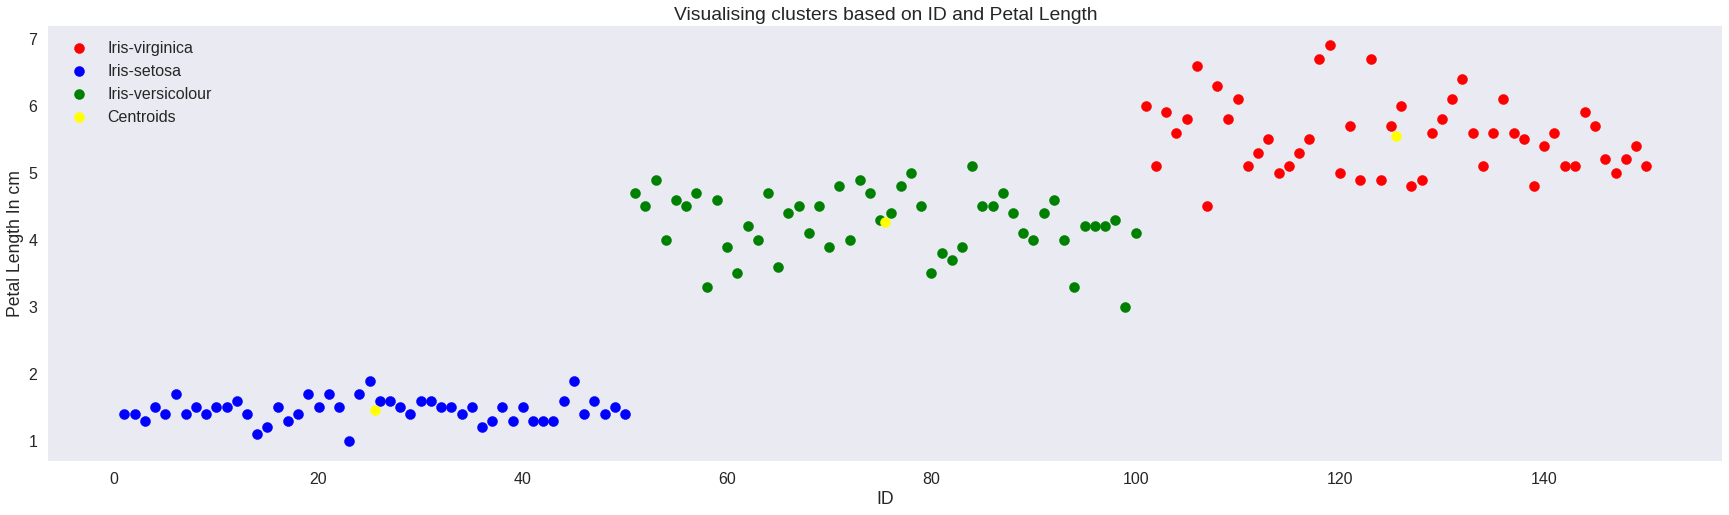

In [28]:
plt.figure(figsize=(30,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('ID')
plt.ylabel('Petal Length In cm')
plt.title('Visualising clusters based on ID and Petal Length')
plt.style.use('seaborn-dark')

plt.legend()

**Visualising the clusters - On the first and last columns**

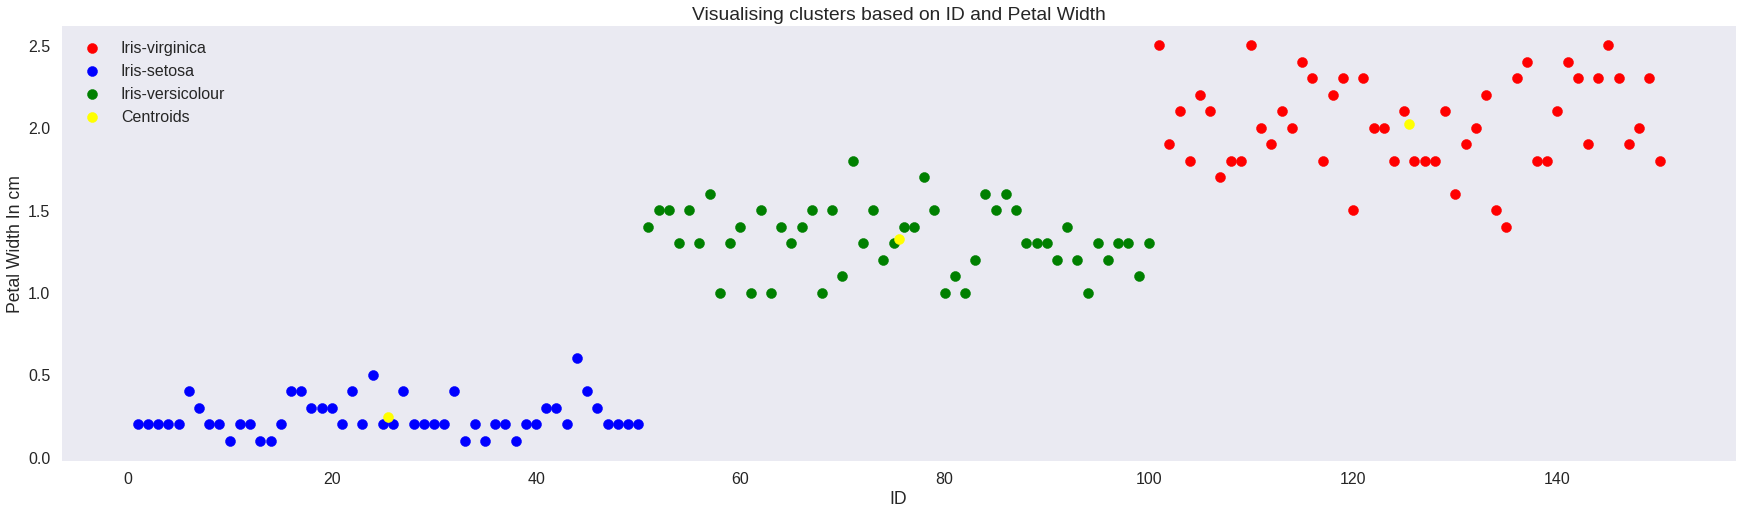

In [29]:
plt.figure(figsize=(30,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,4], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('ID')
plt.ylabel('Petal Width In cm')
plt.title('Visualising clusters based on ID and Petal Width')
plt.style.use('seaborn-dark')

plt.legend()

**Conclusion:**<br>
> We have successfully created optimim number of clusters i.e. **three** clusters from our random data set using **KMeans Clustering Algorithm**. All data clusters are shown in different colors. The visualization is done on each column of the dataset. We can use the same code for making clusters on other data also and can even change the number of clusters in the algorithm.